In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vijayvjy26","key":"e5e2ca6032a8fffe885b226dabb37d75"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset
!unzip covid19-image-dataset.zip -d covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 80% 126M/158M [00:00<00:00, 1.32GB/s]
100% 158M/158M [00:00<00:00, 1.21GB/s]
Archive:  covid19-image-dataset.zip
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0100.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0102.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0105.png  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0106.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0108.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0111.jpg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0112.jpg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0113.jpg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0115.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0118.jpeg  
  inflating: covid19-image-dataset/Covid19-

In [ ]:

import os
import pandas as pd

train_dir = '/content/covid19-image-dataset/Covid19-dataset/train'

image_paths = []
labels = []

def process_directory(directory, label_list, path_list):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            print(f"Processing directory: {label_dir}")
            for image_name in os.listdir(label_dir):
                if image_name.lower().endswith(('.jpeg', '.jpg', '.png')):
                    image_path = os.path.join(label_dir, image_name)
                    path_list.append(image_path)
                    label_list.append(label)
                    print(f"Added image: {image_path} with label: {label}")

process_directory(train_dir, labels, image_paths)

data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

csv_file_path = '/content/covid19-image-dataset/Covid19-dataset/train_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV file for train directory saved successfully!")

Processing directory: /content/covid19-image-dataset/Covid19-dataset/train/Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/044.jpeg with label: Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/COVID-00003b.jpg with label: Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/COVID-00020.jpg with label: Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/049.jpeg with label: Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/COVID-00017.jpg with label: Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/024.jpeg with label: Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/06.jpeg with label: Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/COVID-00028.jpg with label: Covid
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Covid/COVID-00002.jpg with label:

In [ ]:
import os
import pandas as pd

test_dir = '/content/covid19-image-dataset/Covid19-dataset/test'

test_image_paths = []
test_labels = []

def process_test_directory(directory, label_list, path_list):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith(('.jpeg', '.jpg', '.png')):
                image_path = os.path.join(root, file)
                path_list.append(image_path)
                label_list.append("Unknown")

process_test_directory(test_dir, test_labels, test_image_paths)

test_data = {'Image_Path': test_image_paths, 'Label': test_labels}
test_df = pd.DataFrame(test_data)

test_csv_file_path = '/content/covid19-image-dataset/Covid19-dataset/test_data.csv'
test_df.to_csv(test_csv_file_path, index=False)

print("CSV file for test folder saved successfully!")


CSV file for test folder saved successfully!


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception  , DenseNet121 , VGG16 , MobileNetV2  , InceptionV3
from keras import layers, models, optimizers

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/covid19-image-dataset/Covid19-dataset/train_data.csv')

train_df, val_df = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
num_classes = len(df['Label'].unique())
print(num_classes)


3


In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 200 validated image filenames belonging to 3 classes.
Found 51 validated image filenames belonging to 3 classes.


In [ ]:
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                            Image_Path            Label
158  /content/covid19-image-dataset/Covid19-dataset...           Normal
215  /content/covid19-image-dataset/Covid19-dataset...  Viral Pneumonia
101  /content/covid19-image-dataset/Covid19-dataset...            Covid
137  /content/covid19-image-dataset/Covid19-dataset...           Normal
66   /content/covid19-image-dataset/Covid19-dataset...            Covid
(200, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 158 to 102
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  200 non-null    object
 1   Label       200 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB
None
                                               Image_Path  Label
count                                                 200    200
unique                                                200      3
top     /content/covid19-image-dataset/Covid19-dataset... 

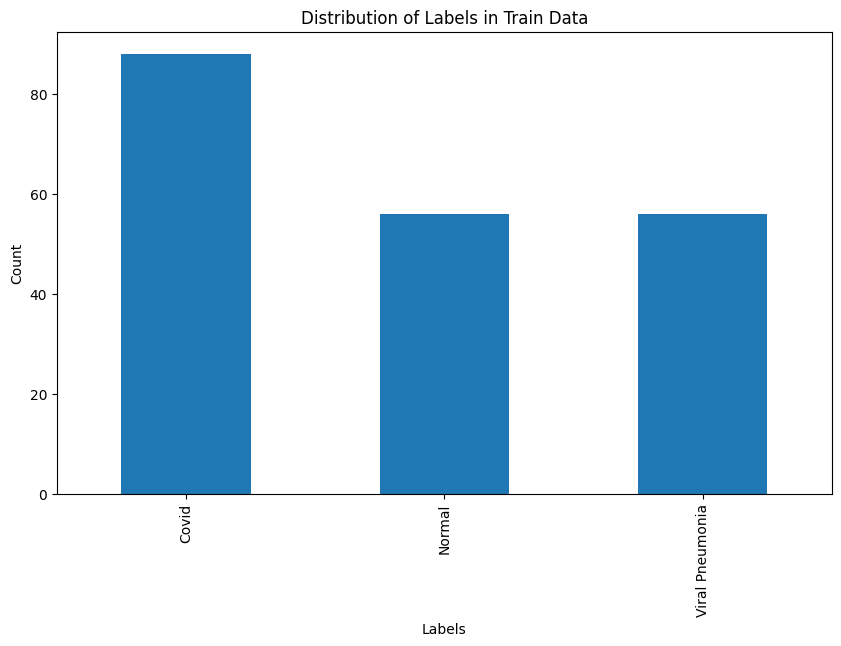

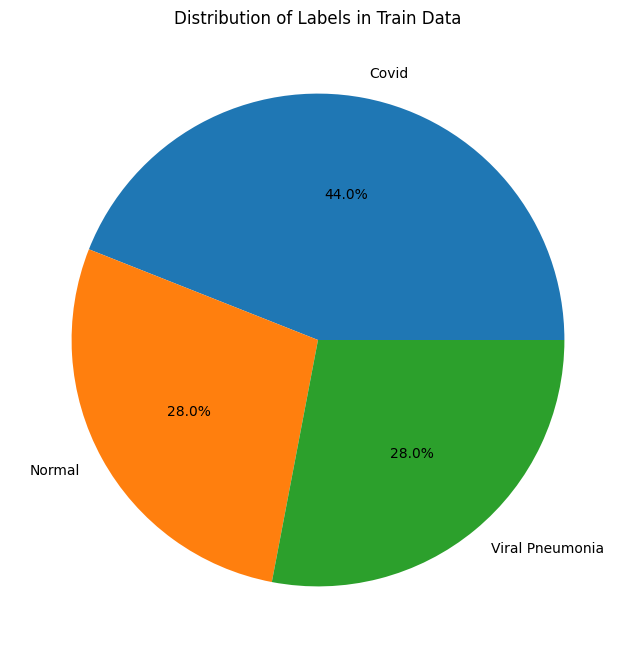

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
train_df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels in Train Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 8))
train_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Labels in Train Data')
plt.ylabel('')
plt.show()

Number of unique image paths: 200


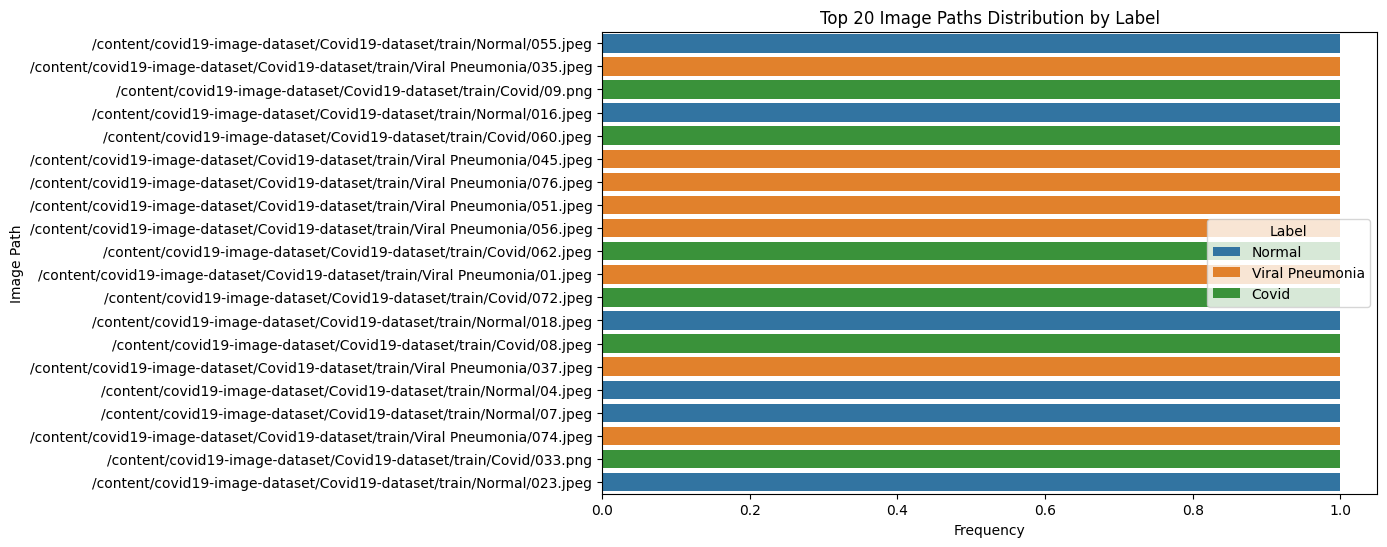

Column Image_Path has 200 unique values.
Column Label has 3 unique values.


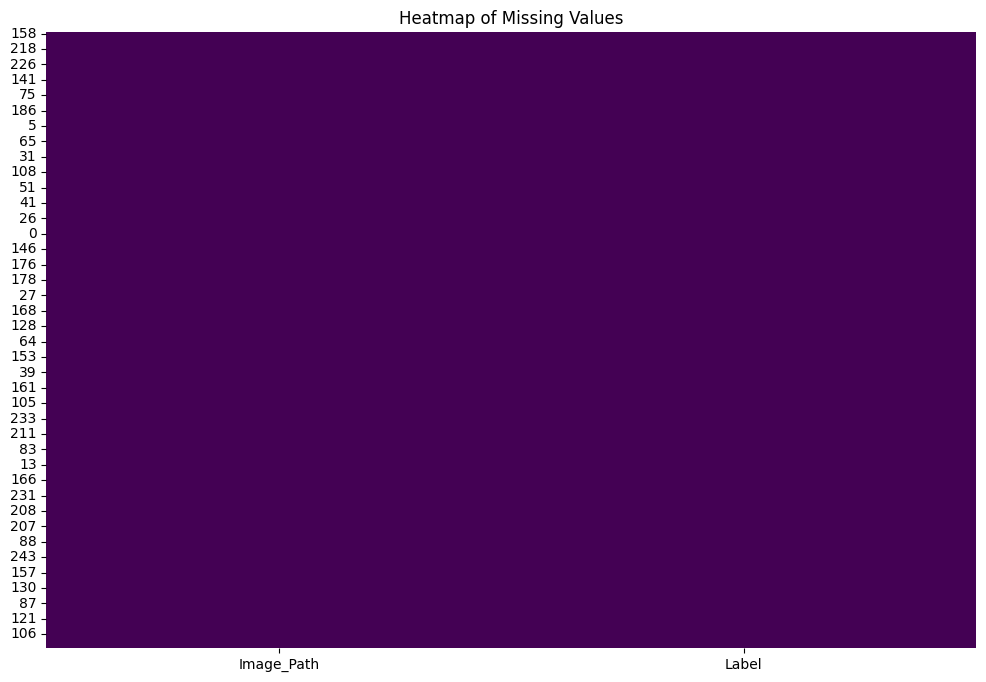

Label
Covid              88
Normal             56
Viral Pneumonia    56
Name: count, dtype: int64


In [ ]:
unique_paths = train_df['Image_Path'].nunique()
print(f"Number of unique image paths: {unique_paths}")

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='Image_Path', hue='Label', order=train_df['Image_Path'].value_counts().index[:20])
plt.title('Top 20 Image Paths Distribution by Label')
plt.xlabel('Frequency')
plt.ylabel('Image Path')
plt.show()

for column in train_df.select_dtypes(include=['object']).columns:
    unique_values = train_df[column].nunique()
    print(f"Column {column} has {unique_values} unique values.")

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

label_counts = train_df['Label'].value_counts()
print(label_counts)

In [ ]:
print(train_df.isnull().sum())
train_df.fillna(method='ffill', inplace=True)
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

Image_Path    0
Label         0
dtype: int64
0


/tmp/ipython-input-22-1158813042.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df.fillna(method='ffill', inplace=True)


In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D

from keras.layers import Dropout

def create_model(base_model, input_shape, num_classes):
    base_model.trainable = True  # Unfreeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:

from keras.callbacks import EarlyStopping , ReduceLROnPlateau
def train_and_evaluate(model, train_data, val_data, model_name, epochs=10):

    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

    history = model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=epochs,
                        callbacks=[early_stopping])

    val_accuracy = history.history['val_accuracy'][-1]
    print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')
    plt.show()

    return history

In [ ]:

def model_training (base_models):

  save_dir = 'saved_models'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  histories = {}
  for base_model, input_shape, model_name in base_models:
      if input_shape != (224, 224, 3):
          pass

      model = create_model(base_model, input_shape, num_classes)

      epochs = 20
      optimizer = optimizers.Adam()

      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

      print(f'Training {model_name}...')
      history = train_and_evaluate(model, train_generator, validation_generator, model_name, epochs=epochs)
      histories[model_name] = history

      model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
      print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

Training VGG16...
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3537 - loss: 1.2354 - val_accuracy: 0.4510 - val_loss: 1.0508
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4060 - loss: 1.1341 - val_accuracy: 0.4510 - val_loss: 0.9841
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4623 - loss: 0.9860 - val_accuracy: 0.5294 - val_loss: 0.9232
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5179 - loss: 0.9710 - val_accuracy: 0.4902 - val_loss: 0.7577
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4992 - loss: 0.9148 - val_accuracy: 0.6667 - val_loss: 0.7283
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5665 - loss: 0.8171 - val_accuracy: 0.6863 - val_loss: 0.6774
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6116 - loss: 0.7530 - val_accuracy: 0.6078 - val_loss: 0.7254
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5910 - loss: 0.8227 - val_accuracy: 0.6471 - val_loss: 

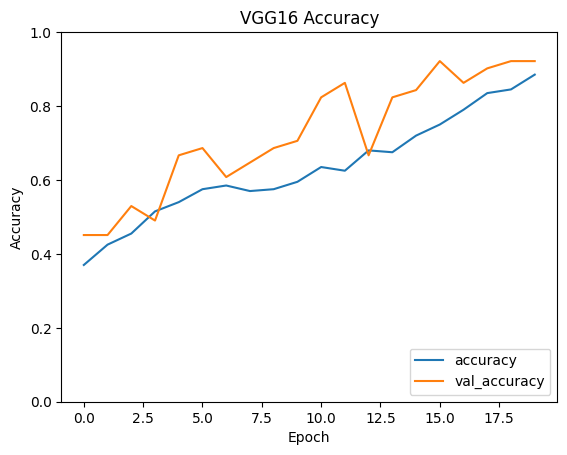

Saved VGG16 model to saved_models/VGG16_saved.h5


In [ ]:
base_models1 = [
    (VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3),'VGG16')
]
model_training (base_models1)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training DenseNet121...
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 336s 27s/step - accuracy: 0.3547 - loss: 1.5252 - val_accuracy: 0.7255 - val_loss: 0.8027
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5609 - loss: 1.0519 - val_accuracy: 0.7255 - val_loss: 0.6666
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6169 - loss: 0.8495 - val_accuracy: 0.8627 - val_loss: 0.5241
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7685 - loss: 0.5586 - val_accuracy: 0.9412 - val_loss: 0.4155
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7872 - loss: 0.4681 - val_accuracy: 0.9608 - val_loss: 0.3267
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8616 - loss: 0.3549 - val_accuracy: 0.9608 - val_loss: 0.2581
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9351 - loss: 0.2394 - val_accuracy: 0.9412 - val_loss: 0.2188
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy:

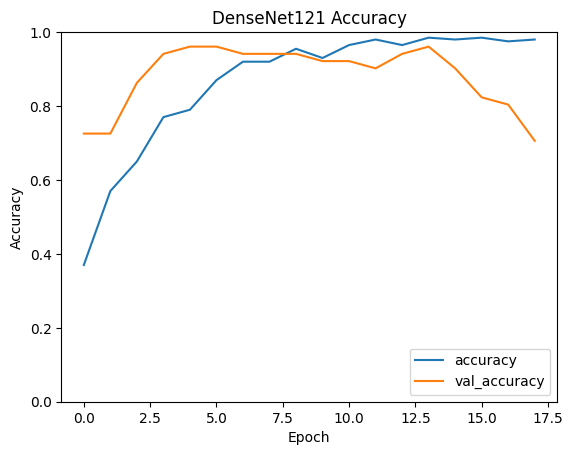

Saved DenseNet121 model to saved_models/DenseNet121_saved.h5


In [ ]:
base_models2 = [
    (DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'DenseNet121')
]
model_training (base_models2)

Training InceptionV3...
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 141s 10s/step - accuracy: 0.3321 - loss: 1.1750 - val_accuracy: 0.5882 - val_loss: 0.9873
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6620 - loss: 0.8492 - val_accuracy: 0.5882 - val_loss: 0.9116
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7580 - loss: 0.6800 - val_accuracy: 0.6275 - val_loss: 0.9397
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8181 - loss: 0.5203 - val_accuracy: 0.5686 - val_loss: 1.0502
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7896 - loss: 0.4335 - val_accuracy: 0.6667 - val_loss: 1.0453
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8500 - loss: 0.3298 - val_accuracy: 0.7843 - val_loss: 0.7271
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9317 - loss: 0.2475 - val_accuracy: 0.7647 - val_loss: 0.6934
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 976ms/step - accuracy: 0.9556 - loss: 0.1391 - val_accuracy: 0.7843 - 

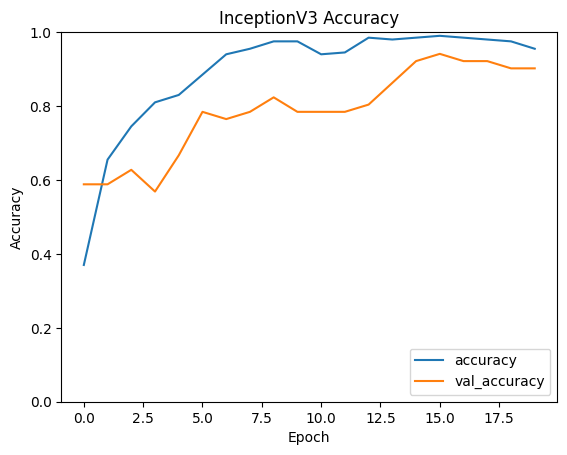

Saved InceptionV3 model to saved_models/InceptionV3_saved.h5
Training Xception...
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 94s 6s/step - accuracy: 0.3489 - loss: 1.1407 - val_accuracy: 0.6078 - val_loss: 0.9540
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5349 - loss: 0.9975 - val_accuracy: 0.7451 - val_loss: 0.8238
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7232 - loss: 0.8116 - val_accuracy: 0.7255 - val_loss: 0.6965
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8223 - loss: 0.5887 - val_accuracy: 0.6863 - val_loss: 0.5978
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8295 - loss: 0.4876 - val_accuracy: 0.7647 - val_loss: 0.4956
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8883 - loss: 0.3853 - val_accuracy: 0.9216 - val_loss: 0.3133
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9553 - loss: 0.2424 - val_accuracy: 0.9216 - val_loss: 0.2723
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accu

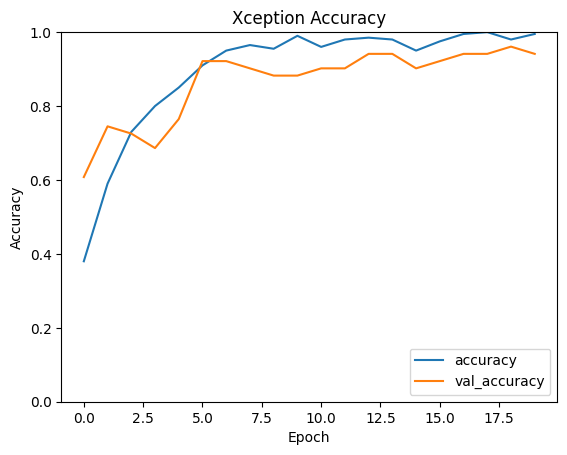

Saved Xception model to saved_models/Xception_saved.h5
Training MobileNetV2...
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.3646 - loss: 1.4657 - val_accuracy: 0.4510 - val_loss: 1.0502
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4274 - loss: 1.1619 - val_accuracy: 0.5098 - val_loss: 0.9473
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6545 - loss: 0.7948 - val_accuracy: 0.5686 - val_loss: 0.8255
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6917 - loss: 0.7337 - val_accuracy: 0.6471 - val_loss: 0.7470
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 954ms/step - accuracy: 0.7067 - loss: 0.6376 - val_accuracy: 0.6471 - val_loss: 0.7024
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7893 - loss: 0.5396 - val_accuracy: 0.7255 - val_loss: 0.6146
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8524 - loss: 0.4377 - val_accuracy: 0.8431 - val_loss: 0.5411
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 953ms/step - 

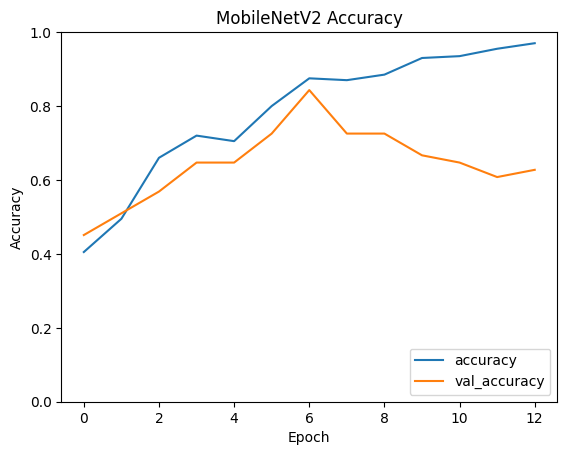

Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5


In [ ]:
base_models3 = [
  (InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'InceptionV3'),
  (Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'Xception'),
  (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2')
]
model_training(base_models3)

Training MobileNetV2...
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 91s 6s/step - accuracy: 0.2934 - loss: 1.4826 - val_accuracy: 0.5490 - val_loss: 0.9306
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4276 - loss: 1.1142 - val_accuracy: 0.5686 - val_loss: 0.8540
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6670 - loss: 0.7797 - val_accuracy: 0.6275 - val_loss: 0.7679
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 944ms/step - accuracy: 0.6507 - loss: 0.7822 - val_accuracy: 0.7059 - val_loss: 0.6692
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 919ms/step - accuracy: 0.6889 - loss: 0.7053 - val_accuracy: 0.7255 - val_loss: 0.6100
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7795 - loss: 0.5534 - val_accuracy: 0.7647 - val_loss: 0.5503
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8805 - loss: 0.4209 - val_accuracy: 0.7843 - val_loss: 0.5111
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 909ms/step - accuracy: 0.8425 - loss: 0.3817 - val_accuracy: 0.784

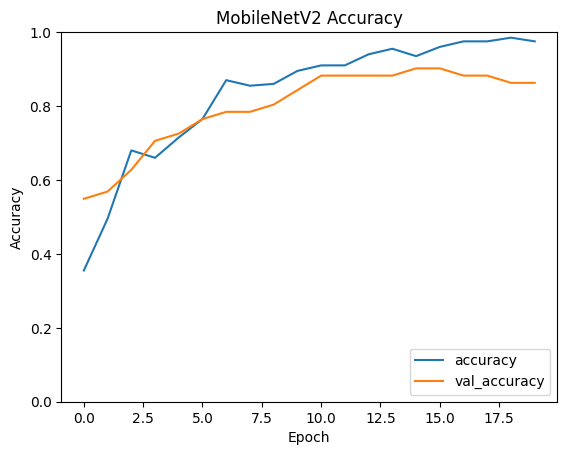

Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5


In [ ]:
base_models4 = [
  (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2')
]
model_training (base_models4)


In [ ]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image

test_df = pd.read_csv('/content/covid19-image-dataset/Covid19-dataset/test_data.csv')

class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

model_dir = '/content/saved_models'

batch_size = 32

def process_images_in_batches(image_paths, model, target_size, batch_size):
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate number of batches

    all_predictions = []

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)
        batch_paths = image_paths[start_idx:end_idx]

        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = img / 255.0
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_predictions_probs = model.predict(batch_images)
        batch_predictions = np.argmax(batch_predictions_probs, axis=1)

        all_predictions.extend(batch_predictions)

    return all_predictions

for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        if "Xception_saved" in model_file or "InceptionV3_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        image_paths = test_df['Image_Path'].tolist()
        prediction = process_images_in_batches(image_paths, model, target_size, batch_size)

        prediction_labels = [class_indices_inverse[label] for label in prediction]

        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'Label': prediction_labels,
        })

        csv_path = f'/content/saved_models/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predictions saved to /content/saved_models/predicted_DenseNet121_saved.csv


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predictions saved to /content/saved_models/predicted_MobileNetV2_saved.csv


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions saved to /content/saved_models/predicted_VGG16_saved.csv


Predictions using: predicted_DenseNet121_saved


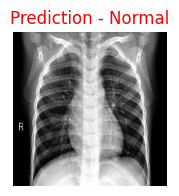

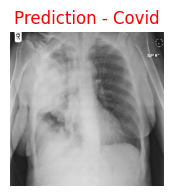

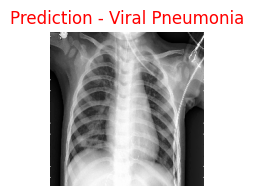

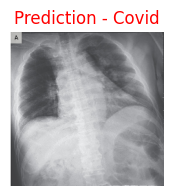

Predictions using: predicted_VGG16_saved


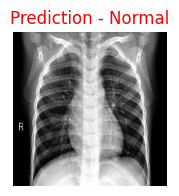

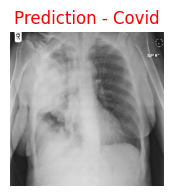

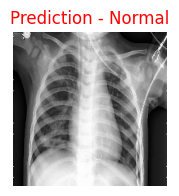

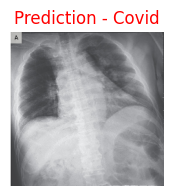

Predictions using: predicted_MobileNetV2_saved


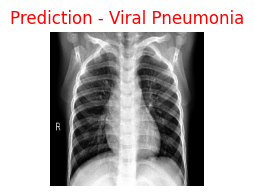

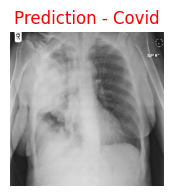

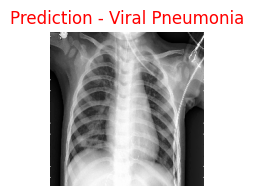

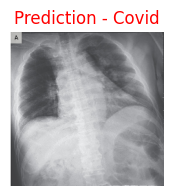

In [ ]:
import csv
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

filenames = [
    '/content/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg',
    '/content/covid19-image-dataset/Covid19-dataset/test/Covid/0113.jpg',
    '/content/covid19-image-dataset/Covid19-dataset/test/Viral Pneumonia/0113.jpeg',
    '/content/covid19-image-dataset/Covid19-dataset/test/Covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg'
]

def load_predicted_labels(csv_file_path):
    predicted_labels = {}
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            predicted_labels[row['Image_Path']] = row['Label']
    return predicted_labels

def visualize_predictions(filenames, predicted_labels):
    for filename in filenames:
        img = image.load_img(filename, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_processed = img_array / 255.0

        if filename in predicted_labels:
            predicted_class_name = predicted_labels[filename]
        else:
            print(f"Filename not found: {filename}")
            predicted_class_name = "Unknown"

        plt.figure(figsize=(2, 2))
        plt.imshow(img_processed)
        plt.title(f"Prediction - {predicted_class_name}", size=12, color='red')
        plt.axis('off')
        plt.show()

csv_dir = '/content/saved_models'

for csv_file in os.listdir(csv_dir):
    if csv_file.startswith('predicted_') and csv_file.endswith('.csv'):

        model_name = csv_file.split('.')[0]

        predicted_csv_file = os.path.join(csv_dir, csv_file)

        predicted_labels = load_predicted_labels(predicted_csv_file)

        print(f"Predictions using: {model_name}")
        visualize_predictions(filenames, predicted_labels)